# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd 
import numpy as np
import requests 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns; sns.set()
import os
import json
import tweepy
from bs4 import BeautifulSoup
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import time
import datetime
import warnings

In [2]:
consumer_key = 'UBwSxmdMyPCGeGBnvTV8jytmN'
consumer_secret = 'kq7SwmVV84Q1cV51TsbnNVd0bx9GwNZfpNUdE1XLcYwUqiUZ68'
access_token = '3097686058-PGxRQWYfBO3An9uH03VgPI9Fwj3yxNpkE2NmE13'
access_token_secret = 'HHzKEqrKnSLnusPXB1f6VNnauNcElzd9Q2EyCVzSMAJKW'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGZXjgEAAAAAygkVj8qfbdZyeYvKCWKHsIs4ur8%3DxE5X406tJQ66eRAU1dHDPofYPEOWhyv5iTFnOeoVqsBbznOz5D'

auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

In [3]:
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

## 1. Collecting data from twitter using tweepy

In [4]:
# querying the twitter api for recents tweets from the @dog_rates handle
# Excluding retweets and limiting response to 100
query = 'from:dog_rates -is:retweet'

# get max. 100 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [5]:
tweets_dict = tweets.json() 

In [8]:
tweets_data = tweets_dict['data'] 
#write list into txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets_data, indent=4))

In [7]:
df_dog_rates = pd.json_normalize(tweets_data) 


In [192]:
df_dog_rates.head()

,edit_history_tweet_ids,author_id,id,text,created_at
0,[1597389462727983104],4196983835,1597389462727983104,@jill_derby here’s one way!\nhttps://t.co/XQB9...,2022-11-29T00:38:20.000Z
1,[1597329073348354048],4196983835,1597329073348354048,@Goddess616 @TYDISH it does!,2022-11-28T20:38:22.000Z
2,[1597319467020607488],4196983835,1597319467020607488,@Licia_Haze @TYDISH unfortunately we can’t int...,2022-11-28T20:00:12.000Z
3,[1597317083800694785],4196983835,1597317083800694785,"@JoJo47345316 @TYDISH hopefully by January, an...",2022-11-28T19:50:44.000Z
4,[1597315163136237568],4196983835,1597315163136237568,@_afangirlthing omg jealous,2022-11-28T19:43:06.000Z


## 2. Connecting to archived data provided in CSV

In [193]:
df_weratedogs = pd.read_csv('twitter-archive-enhanced.csv')
df_weratedogs.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [194]:
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [195]:
# to get a sense of the total available data size
df_weratedogs.shape

(2356, 17)

## 3. Connecting to image file

In [196]:
# image prediction file 
# web scrapping block
url_img = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url_img, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [197]:
# Showing the data in the image predictions file
df_image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visually assessing the data

In [198]:
#Visual assessment
df_weratedogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [199]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [200]:
df_dog_rates

,edit_history_tweet_ids,author_id,id,text,created_at
0,[1597389462727983104],4196983835,1597389462727983104,@jill_derby here’s one way!\nhttps://t.co/XQB9...,2022-11-29T00:38:20.000Z
1,[1597329073348354048],4196983835,1597329073348354048,@Goddess616 @TYDISH it does!,2022-11-28T20:38:22.000Z
2,[1597319467020607488],4196983835,1597319467020607488,@Licia_Haze @TYDISH unfortunately we can’t int...,2022-11-28T20:00:12.000Z
3,[1597317083800694785],4196983835,1597317083800694785,"@JoJo47345316 @TYDISH hopefully by January, an...",2022-11-28T19:50:44.000Z
4,[1597315163136237568],4196983835,1597315163136237568,@_afangirlthing omg jealous,2022-11-28T19:43:06.000Z
...,...,...,...,...,...
56,[1595152859422756864],4196983835,1595152859422756864,@grhough he's happy to lend you his,2022-11-22T20:30:52.000Z
57,[1595151920020480001],4196983835,1595151920020480001,@rmballs we all want to hug Sam,2022-11-22T20:27:08.000Z
58,[1595150927199019008],4196983835,1595150927199019008,@PrinceyAlex2 perhaps both tbh,2022-11-22T20:23:12.000Z
59,[1595150758512451584],4196983835,1595150758512451584,@badgertricia he’s glad to be of assistance,2022-11-22T20:22:31.000Z


### Assessing the data through its description through code

In [201]:
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [202]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [203]:
df_dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  61 non-null     object
 1   author_id               61 non-null     object
 2   id                      61 non-null     object
 3   text                    61 non-null     object
 4   created_at              61 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [204]:
df_weratedogs.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Quality issues
1. A number of columns seem to have empty or null values 

2. There is duplicate data from the retweets

3. The data type of the tweet_id is in int format instead of string

4. Some of the dog names are repeated in multiple columns 

5. The timezome formating needs to be cleaned 

6. The ratings data seems to be inconsistent 

7. The image_pred file shows multiple predictions with different confidence levels

8. Some of the columns need to be renamed for clarity

### Tidiness issues
1. Drop empty cells

2. Drop duplicate or unnecesary cells

# Clean

In [205]:
df_weratedogs_clean = df_weratedogs.copy()
df_image_pred_clean = df_image_pred.copy()
df_dog_rates_clean = df_dog_rates.copy()

### Merge all files

In [206]:
df_all = pd.concat([df_weratedogs_clean, df_image_pred_clean, df_dog_rates_clean ])

In [207]:
df_all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,edit_history_tweet_ids,author_id,id,created_at
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df_all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'edit_history_tweet_ids',
       'author_id', 'id', 'created_at'],
      dtype='object')

In [209]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4492 entries, 0 to 60
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4431 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2417 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 no

#### 1. create single column for all dog types

In [210]:
df_all['dogs_species'] = df_all['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [211]:

df_all[['dogs_species', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dogs_species,doggo,floofer,pupper,puppo
279,NaN,NaN,NaN,NaN,NaN
1230,NaN,NaN,NaN,NaN,NaN
623,NaN,NaN,NaN,NaN,NaN
1244,NaN,NaN,NaN,NaN,NaN
1926,NaN,None,None,None,None


In [212]:
df_all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,edit_history_tweet_ids,author_id,id,created_at,dogs_species
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df_all.dogs_species.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_species, dtype: int64

#### 2. Delete unused data

In [214]:
df_all = df_all[np.isnan(df_all.retweeted_status_id)]

In [215]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 60
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4250 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2236 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  doggo                       2175 no

#### 3. Delete unused columns

In [216]:
df_all = df_all.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


In [217]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 60
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                4250 non-null   float64
 1   in_reply_to_status_id   78 non-null     float64
 2   in_reply_to_user_id     78 non-null     float64
 3   timestamp               2175 non-null   object 
 4   source                  2175 non-null   object 
 5   text                    2236 non-null   object 
 6   expanded_urls           2117 non-null   object 
 7   rating_numerator        2175 non-null   float64
 8   rating_denominator      2175 non-null   float64
 9   name                    2175 non-null   object 
 10  doggo                   2175 non-null   object 
 11  floofer                 2175 non-null   object 
 12  pupper                  2175 non-null   object 
 13  puppo                   2175 non-null   object 
 14  jpg_url                 2075 non-null   ob

#### 4. Remove more columns no longer needed and duplicate columns

In [218]:
df_all.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

In [219]:
# Ref: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df_all = df_all.loc[:,~df_all.columns.duplicated()]

In [220]:
df_all.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'edit_history_tweet_ids', 'author_id', 'id',
       'created_at', 'dogs_species'],
      dtype='object')

#### 5. Change tweet id from integer to string

In [221]:
df_all['tweet_id'] = df_all['tweet_id'].astype(str)

In [222]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                4311 non-null   object 
 1   timestamp               2175 non-null   object 
 2   text                    2236 non-null   object 
 3   expanded_urls           2117 non-null   object 
 4   rating_numerator        2175 non-null   float64
 5   rating_denominator      2175 non-null   float64
 6   name                    2175 non-null   object 
 7   doggo                   2175 non-null   object 
 8   floofer                 2175 non-null   object 
 9   pupper                  2175 non-null   object 
 10  puppo                   2175 non-null   object 
 11  jpg_url                 2075 non-null   object 
 12  p1                      2075 non-null   object 
 13  p1_conf                 2075 non-null   float64
 14  p1_dog                  2075 non-null   ob

#### 6. Change timezone format

In [223]:
df_all['timestamp'] = df_all['timestamp'].str.slice(start=0, stop=-6)
#remove the timezone

In [224]:
# rename the 'timestamp' column to a datetime object
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [225]:
df_all.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,edit_history_tweet_ids,author_id,id,created_at,dogs_species
0,8.924206435553362e+17,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774213063434e+17,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918151813780849e+17,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.916895572798587e+17,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.913275589266883e+17,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 7. Correct naming issues

In [226]:
df_all.name = df_all.name.str.replace('^[a-z]+', 'None')

/var/folders/0n/fw2y8vf50r5ct02c6qt2styw0000gn/T/ipykernel_39888/4038190816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all.name = df_all.name.str.replace('^[a-z]+', 'None')


In [227]:
df_all['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [228]:
df_all['name'].sample(10)

1456        NaN
218         NaN
711     Frankie
494         NaN
1905        NaN
1785        NaN
646        Nida
1404        NaN
501         NaN
1848        NaN
Name: name, dtype: object

#### 8. Make the ratings of the dogs consistent

In [229]:
df_all['rating_numerator'] = df_all['rating_numerator'].astype(float)

In [230]:
df_all['rating_denominator'] = df_all['rating_denominator'].astype(float)

In [231]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tweet_id                4311 non-null   object        
 1   timestamp               2175 non-null   datetime64[ns]
 2   text                    2236 non-null   object        
 3   expanded_urls           2117 non-null   object        
 4   rating_numerator        2175 non-null   float64       
 5   rating_denominator      2175 non-null   float64       
 6   name                    2175 non-null   object        
 7   doggo                   2175 non-null   object        
 8   floofer                 2175 non-null   object        
 9   pupper                  2175 non-null   object        
 10  puppo                   2175 non-null   object        
 11  jpg_url                 2075 non-null   object        
 12  p1                      2075 non-null   object    

#### Analyzing the image dataframes

In [233]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1104,722613351520608256,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1,Labrador_retriever,0.530915,True,golden_retriever,0.288230,True,chow,0.044854,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False


In [234]:
Image(url = 'https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg')

In [235]:
# Create a new column called rating, and calulate the value
df_all['rating'] = df_all['rating_numerator'] / df_all['rating_denominator']

In [236]:
df_all.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

#### 9. Dog breed column from image pred

In [148]:
#Using the first prediction of the dog from image file to create new column
df_all['dog_breed'] = df_all.loc[:, 'p1']

## Storing and Visualizing



In [130]:
# Storing the new twitter_dogs df to a new csv file
df_all.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [132]:
df_all.timestamp = pd.to_datetime(df_all['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df_all.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

/var/folders/0n/fw2y8vf50r5ct02c6qt2styw0000gn/T/ipykernel_39888/3903341245.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    2175
dtype: int64

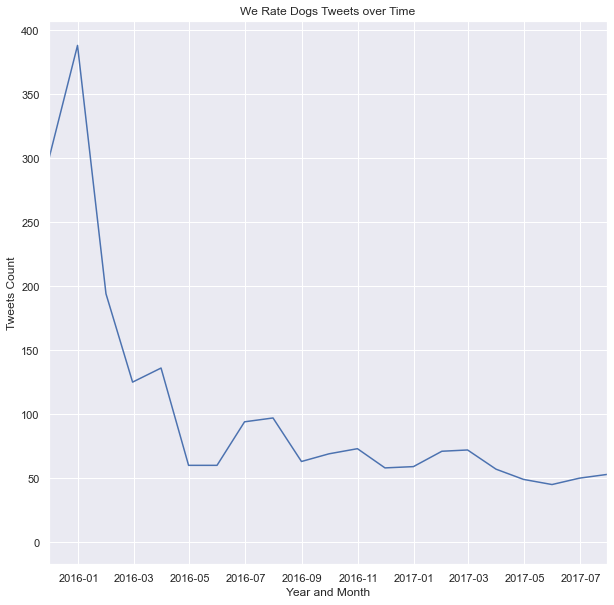

In [133]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

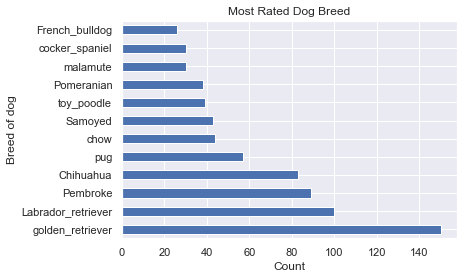

In [150]:
# Histogram to visualize dog breeeds
dog_breed = df_all.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p3,p3_conf,p3_dog,created_at,id,edit_history_tweet_ids,author_id,dogs_species,rating,dog_breed


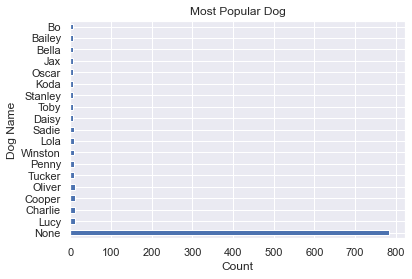

In [178]:
# Histogram to visualize nost popular dog name
df_all.name.value_counts().loc[lambda x: x>5].plot(kind = 'barh')
plt.title('Most Popular Dog')
plt.xlabel('Count')
plt.ylabel('Dog Name');

In [168]:
df_all.name.value_counts().loc[lambda x: x>5]

None       784
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Stanley      6
Koda         6
Oscar        6
Jax          6
Bella        6
Bailey       6
Bo           6
Name: name, dtype: int64